In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [2]:
# function defined by the user to determine whether a library is installed or not; if not, installation will occur automatically during runtime.
def checkforlibrary(Lib_name):
    try:
        importlib.import_module(Lib_name)
        print(f"{Lib_name} is already installed.")
    except ImportError:
        print(f"{Lib_name} is not installed. Installing...")
        try:
            import pip
            pip.main(['install', Lib_name])
        except:
            print("Error: Failed to install the library. Please install it manually.")

In [3]:
df=pd.read_csv('../DataSet/amazon_product_reviews/ratings_Electronics.csv',names=['userId', 'productId','rating','timestamp'])

In [4]:
all_data=df.sample(n=1564896,ignore_index=True)

Since our dataset is too big and it will be difficult to analyze the entire dataset due to limited resources,thats'why I am randomly taking 30% of the data as sample out of the whole dataset which is 1564896.

In [5]:
df.shape
# df.columns 

(7824482, 4)

In [6]:
all_data=df.sample(n=2347344,ignore_index=True)

In [7]:
#deleting all unnecessary unused dataset
del df

In [8]:
all_data.head(10)

,userId,productId,rating,timestamp
0,A2BPSJWOY2VS1W,B000EMWBT2,5.0,1151539200
1,A1CDU7PR0VGE0V,B003XM73P2,5.0,1402963200
2,AKZ5ODMYQKBQA,B000BO3CW8,5.0,1375833600
3,A2FKK79BJNW52D,B005LJQMZC,5.0,1389571200
4,A2EIJPS0DXTZ1R,B002ROAX3G,5.0,1386374400
5,A32XUSH2E67EHV,B007F9XHBI,5.0,1373587200
6,A1NO9I5QU2NZKP,B001MQ0ROU,1.0,1352937600
7,A1IXL625K5NBX2,B00002NDRQ,5.0,1365033600
8,A2LNINZ6HRB8I,B001FA09XW,4.0,1263513600
9,A3JZX59E9IX517,B003IT49LG,3.0,1297641600


In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347344 entries, 0 to 2347343
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 71.6+ MB


In [10]:
#droping unwanted 4th timestamp table
all_data.drop('timestamp',axis=1,inplace=True)


In [11]:
# As we can see, the items have a minimum rating of 1, a maximum rating of 5, and an average rating of about 4.
#handle missing values
all_data.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [12]:
#handling duplicate records
all_data[all_data.duplicated()].shape[0]

0

In [13]:
all_data.head()

,userId,productId,rating
0,A2BPSJWOY2VS1W,B000EMWBT2,5.0
1,A1CDU7PR0VGE0V,B003XM73P2,5.0
2,AKZ5ODMYQKBQA,B000BO3CW8,5.0
3,A2FKK79BJNW52D,B005LJQMZC,5.0
4,A2EIJPS0DXTZ1R,B002ROAX3G,5.0


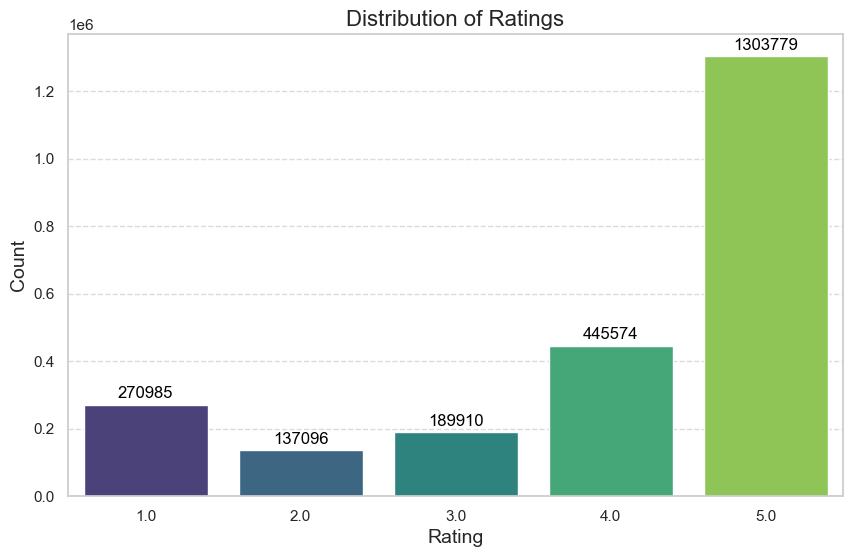

In [14]:
# Set a seaborn style
sns.set(style="whitegrid")
# Create a figure and axis with better size
fig, ax = plt.subplots(figsize=(10, 6))
# Use seaborn's countplot with palette to distinguish different bars
sns.countplot(x='rating', data=all_data, palette="viridis", ax=ax)
# Set a title with a larger font size
ax.set_title('Distribution of Ratings', fontsize=16)
# Labeling axes with larger font size
ax.set_xlabel('Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
# Show counts on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 8),
                textcoords='offset points')

# Add a grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)
# Display the plot
plt.show()

In [15]:
print('Total rating : ',all_data.shape[0])
print('Total unique users : ',all_data['userId'].unique().shape[0])
print('Total unique products : ',all_data['productId'].unique().shape[0])

Total rating :  2347344
Total unique users :  1710144
Total unique products :  287667


In [16]:
no_of_rated_products_per_user = all_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
A5JLAU2ARJ0BO     153
A3OXHLG6DIBRW8    139
ADLVFFE4VBT8      139
A6FIAB28IS79      136
A1ODOGXEYECQQ8    124
Name: rating, dtype: int64

In [17]:
print('No of rated product more than 50 per user : {} '.format(sum(no_of_rated_products_per_user >= 50)))


No of rated product more than 50 per user : 79 


Popularity Based Recommendation

In [18]:
# Assuming all_data is a pandas DataFrame
min_ratings_threshold = 50
# Filter out products with fewer than the specified minimum ratings
data = all_data.groupby('productId')['rating'].transform('count') >= min_ratings_threshold
filtered_data = all_data[data]


In [19]:
filtered_data.head()

,userId,productId,rating
0,A2BPSJWOY2VS1W,B000EMWBT2,5.0
1,A1CDU7PR0VGE0V,B003XM73P2,5.0
2,AKZ5ODMYQKBQA,B000BO3CW8,5.0
3,A2FKK79BJNW52D,B005LJQMZC,5.0
5,A32XUSH2E67EHV,B007F9XHBI,5.0


In [20]:
no_of_rating_per_product=filtered_data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [21]:
no_of_rating_per_product.head()

productId
B0074BW614    5566
B00DR0PDNE    4999
B007WTAJTO    4257
B0019EHU8G    3756
B006GWO5WK    3583
Name: rating, dtype: int64

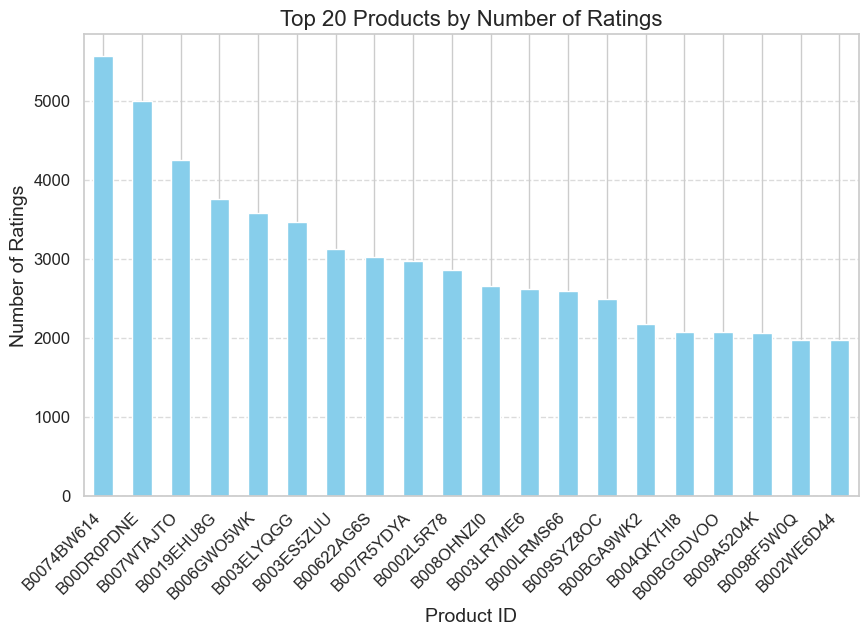

In [22]:
# Assuming no_of_rating_per_product is a pandas Series
no_of_rating_per_product.head(20).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 20 Products by Number of Ratings', fontsize=16)
plt.xlabel('Product ID', fontsize=14)
plt.ylabel('Number of Ratings', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [23]:
mean_rating_product_count=pd.DataFrame(filtered_data.groupby('productId')['rating'].mean())

In [24]:
mean_rating_product_count.head()

,rating
productId,
0972683275,4.468227
1400501466,3.585714
1400532620,3.692308
1400532655,3.713333
140053271X,3.928000


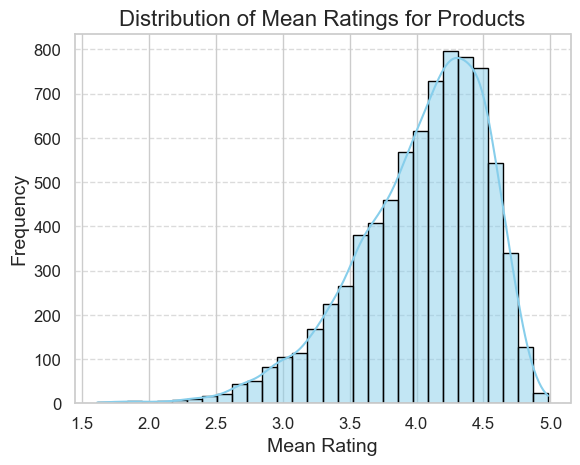

In [25]:
# Assuming mean_rating_product_count is a pandas DataFrame or Series
sns.histplot(mean_rating_product_count['rating'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Mean Ratings for Products', fontsize=16)
plt.xlabel('Mean Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [26]:
skewness = mean_rating_product_count['rating'].skew()

print(f"Skewness of Mean Rating Data: {skewness:.2f}")

# Optionally, you can include a message about the skewness level:
if skewness > 0:
    print("The distribution is positively skewed.")
elif skewness < 0:
    print("The distribution is negatively skewed.")
else:
    print("The distribution is approximately symmetric.")


Skewness of Mean Rating Data: -0.91
The distribution is negatively skewed.


In [27]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(filtered_data.groupby('productId')['rating'].count())

In [28]:
mean_rating_product_count.head()

,rating,rating_counts
productId,,
0972683275,4.468227,299
1400501466,3.585714,70
1400532620,3.692308,52
1400532655,3.713333,150
140053271X,3.928000,125


In [29]:
#highest mean rating product
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.476824,5566


In [30]:
#min mean rating product
print('min average rating product : ',mean_rating_product_count['rating_counts'].min())
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])

min average rating product :  50
total min average rating products :  171


In [31]:
mean_rating_product_count.head()

,rating,rating_counts
productId,,
0972683275,4.468227,299
1400501466,3.585714,70
1400532620,3.692308,52
1400532655,3.713333,150
140053271X,3.928000,125


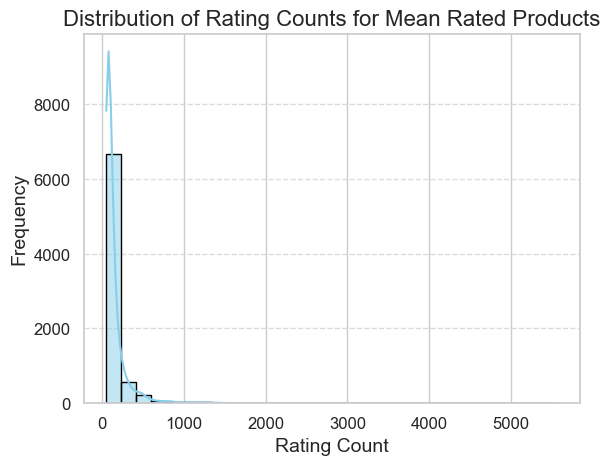

In [32]:
# Assuming mean_rating_product_count is a pandas DataFrame or Series
sns.histplot(mean_rating_product_count['rating_counts'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Rating Counts for Mean Rated Products', fontsize=16)
plt.xlabel('Rating Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

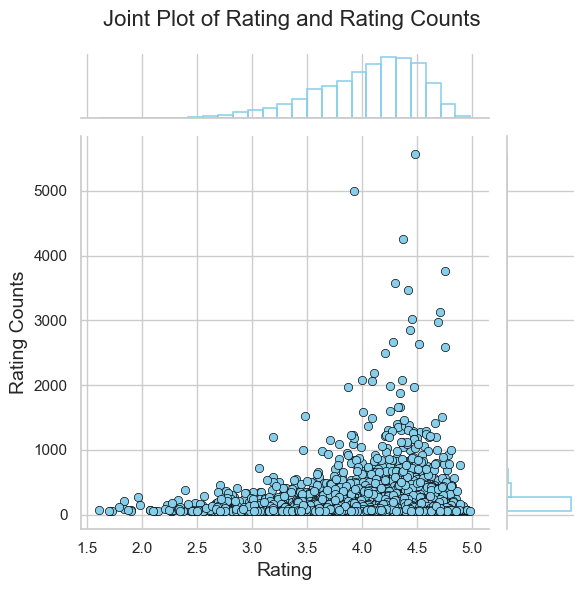

In [33]:
# Assuming mean_rating_product_count is a pandas DataFrame
sns.set(style="whitegrid")
joint_plot = sns.jointplot(x='rating', y='rating_counts', data=mean_rating_product_count, color='skyblue', edgecolor='black', marginal_kws=dict(bins=25, fill=False))

# Set plot titles and labels
joint_plot.fig.suptitle('Joint Plot of Rating and Rating Counts', fontsize=16)
joint_plot.set_axis_labels('Rating', 'Rating Counts', fontsize=14)

# Adjust layout for better appearance
plt.tight_layout(rect=[0, 0, 1, 1])

# Show the plot
plt.show()

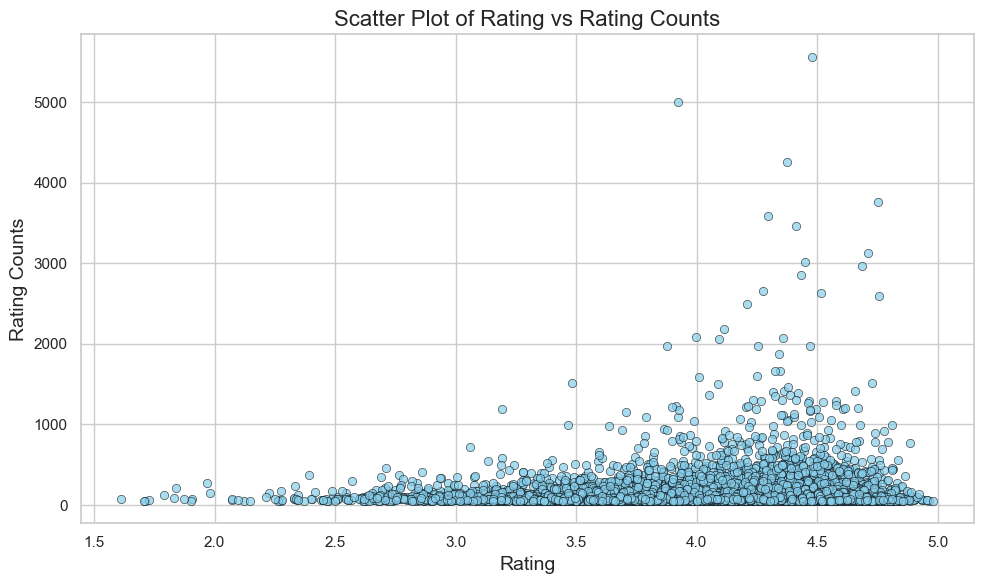

In [34]:
# Assuming mean_rating_product_count is a pandas DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a scatter plot with better aesthetics
sns.scatterplot(x='rating', y='rating_counts', data=mean_rating_product_count, color='skyblue', edgecolor='black', alpha=0.7)

# Set plot title and labels
plt.title('Scatter Plot of Rating vs Rating Counts', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Rating Counts', fontsize=14)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

In [35]:
correlation = mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts'])
print(f"Correlation between Rating and Rating Counts: {correlation}")

Correlation between Rating and Rating Counts: 0.09569410503036656


Collaborative Filtering (Item-Item Recommendation)

Utilized in recommender systems, collaborative filtering is a popular technique designed to populate the missing entries within a user-item association matrix. In our approach, we employ Item-Item Collaborative Filtering (CF). This method operates on the premise that the most effective recommendations arise from individuals with similar preferences. In essence, it leverages the historical item ratings of like-minded users to predict how a given user might rate a particular item. Collaborative filtering comprises two primary sub-categories known as memory-based and model-based approaches.

In [36]:
#import surprise library for collebrative filtering
checkforlibrary('surprise')
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

surprise is already installed.


In [37]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(filtered_data,reader)

In [38]:
#Splitting surprise the dataset into 80,20 ratio using train_test_split
trainset, testset = train_test_split(surprise_data, test_size=0.3,random_state=42)

In [39]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [40]:
#make prediction using testset
test_pred=algo.test(testset)

In [41]:
#print RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred ,verbose=True)

Item-based Model : Test Set
RMSE: 1.3171


1.3170678517188625

**Collaborative filtering system based on models**

These approaches are predicated on data mining and machine learning methodologies. Training models to become predictive is the aim. To train a model to forecast the top-5 items a user could enjoy best, for instance, we might utilize the current user-item interactions. Compared to other approaches like memory-based approach, these methods have the benefit of being able to propose a greater number of items to a greater number of users. Even with huge sparse matrices, they have a large coverage.


In [42]:
# Assuming 'data' is a pandas DataFrame
sample_size = 20000

data_sample = filtered_data.sample(sample_size)
ratings_matrix = data_sample.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)

# Display the first few rows of the ratings matrix
ratings_matrix.head()


productId,0972683275,1400501466,1400532655,140053271X,1400599997,9573212919,9983891212,B00000J061,B00000J1SC,B00000J1V5,...,B00IGISO9C,B00IGUUYTI,B00INNP5VU,B00IO1V33U,B00ISGCAJM,B00IT1WJZQ,B00IVPU786,B00IZBNQO8,B00J5174TU,B00K91DB7Y
userId,,,,,,,,,,,,,,,,,,,,,
A00518203KW2X0ZCUI9R1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A007227915NZZC7B6P030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A008009532VTZWCFFO8E3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00977692WFBFPIDBL3I,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01001491AKX4LBK2SDWP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#check the shape of the rating_matrix
ratings_matrix.shape

(19903, 6148)

In [44]:
#transpose the metrix to make column (productId) as index and index as column (userId)
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

userId,A00518203KW2X0ZCUI9R1,A007227915NZZC7B6P030,A008009532VTZWCFFO8E3,A00977692WFBFPIDBL3I,A01001491AKX4LBK2SDWP,A01178932YOO0P6O397RS,A01438702J9FKU6OVSRCT,A02318352KVAI9NNMCCAB,A02498762414XK2ZUPH22,A0278394QJ8BHJL7YRP2,...,AZYXW6JLVD8SH,AZYY1UQQBJCXD,AZZBB05CJFP35,AZZFFI0Q2VKRC,AZZLS6YRSDOT4,AZZM2HRVRTOL,AZZMKZ6VEHLF9,AZZRSNMGVNY3J,AZZX23UGJGKTT,AZZYBP8LG3NQW
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400532655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140053271X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400599997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
x_ratings_matrix.shape

(6148, 19903)

In [46]:
from sklearn.decomposition import TruncatedSVD

# Assuming 'x_ratings_matrix' is a pandas DataFrame
n_components = 10

# Decompose the matrix using Truncated SVD
svd = TruncatedSVD(n_components=n_components)
decomposed_matrix = svd.fit_transform(x_ratings_matrix)

# Display the shape of the decomposed matrix
print(f"Shape of the decomposed matrix: {decomposed_matrix.shape}")


Shape of the decomposed matrix: (6148, 10)


In [47]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(6148, 6148)

In [48]:
newproduct=x_ratings_matrix.index[10]
print(newproduct)

B00000JDF5


In [49]:
i=newproduct
product_names=list(x_ratings_matrix.index)
product_id=product_names.index(i)
print(product_id)
filtered_data.head(15)

10


,userId,productId,rating
0,A2BPSJWOY2VS1W,B000EMWBT2,5.0
1,A1CDU7PR0VGE0V,B003XM73P2,5.0
2,AKZ5ODMYQKBQA,B000BO3CW8,5.0
3,A2FKK79BJNW52D,B005LJQMZC,5.0
5,A32XUSH2E67EHV,B007F9XHBI,5.0
10,A3KSEAVL9CKPT0,B003DZ166Q,5.0
11,A2UFLDRFOZW8UL,B004W2JKWG,5.0
21,A3QPAMGILVQRCM,B0002QLQ96,5.0
22,A17LD5S19OUJUX,B002EOUUAK,2.0
25,A2RRE91DNXOR0D,B001GGAIGI,4.0


In [50]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(6148,)

In [51]:
correlation_matrix[correlation_product_ID>0.80].shape

(85, 6148)

In [52]:
print(correlation_product_ID)

[-0.68224628  0.1400646   0.51297878 ...  0.33053371  0.40373445
  0.11880299]


In [53]:
#Recommending top 20 highly correlated products in sequence
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.80])
recommend[:20]

['B00000JDF5',
 'B00005T3C8',
 'B0000642RX',
 'B000065BPB',
 'B000067O5G',
 'B00006BBAC',
 'B00006JPDI',
 'B00007GQLU',
 'B0001DQ5YG',
 'B0001FTVEK',
 'B00028Y826',
 'B0002KVQBA',
 'B00065AO0K',
 'B000BDG3HU',
 'B000EHYG9K',
 'B000EP4TWQ',
 'B000FCSXBQ',
 'B000IBROQE',
 'B000KE48CM',
 'B000MS3VGA']

In [54]:
import pandas as pd
import numpy as np
from surprise import KNNWithMeans, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD

# ... (Previous code remains unchanged)

# Assuming 'data' is a pandas DataFrame
sample_size = 50000

data_sample = filtered_data.sample(sample_size)
ratings_matrix = data_sample.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)

# Display the first few rows of the ratings matrix
ratings_matrix.head()

# transpose the matrix to make the column (productId) as the index and index as the column (userId)
x_ratings_matrix = ratings_matrix.T

# Decompose the matrix using Truncated SVD
n_components = 10
svd = TruncatedSVD(n_components=n_components)
decomposed_matrix = svd.fit_transform(x_ratings_matrix)

# Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)

# Get a new product for testing
new_product = x_ratings_matrix.index[10]
print(f"New product: {new_product}")

# Find the product ID in the list
product_names = list(x_ratings_matrix.index)
product_id = product_names.index(new_product)

# Calculate the correlation with other products
correlation_product_ID = correlation_matrix[product_id]

# Filter products highly correlated with the new product
recommended_products = list(x_ratings_matrix.index[correlation_product_ID > 0.80])[:20]

# Display recommended products
print("Recommended Products:")
print(recommended_products)

# Evaluate the recommendation system using Surprise library
# Define a Reader object
reader = Reader(rating_scale=(1, 5))

# Load Surprise Dataset
surprise_data = Dataset.load_from_df(filtered_data, reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(surprise_data, test_size=0.3, random_state=42)

# Collaborative filtering setup with best-performing parameters
algo_rmse = KNNWithMeans(k=5, sim_options={'name': 'pearson', 'user_based': False})
algo_mae = KNNWithMeans(k=10, sim_options={'name': 'cosine', 'user_based': False})

# Fit models
algo_rmse.fit(trainset)
algo_mae.fit(trainset)

# Test models
test_pred_rmse = algo_rmse.test(testset)
test_pred_mae = algo_mae.test(testset)

# ...

# Calculate accuracy percentages
accuracy_rmse = accuracy.rmse(test_pred_rmse, verbose=True)
accuracy_mae = accuracy.mae(test_pred_mae, verbose=True)

# Calculate overall accuracy percentage
overall_accuracy = (100 - accuracy_rmse + 100 - accuracy_mae) / 2

# Print the accuracy percentages
print(f'RMSE Accuracy Percentage: {100 - accuracy_rmse:.2f}%')
print(f'MAE Accuracy Percentage: {100 - accuracy_mae:.2f}%')
print(f'Overall Accuracy Percentage: {overall_accuracy:.2f}%')


New product: B00000J1SC
Recommended Products:
['1400501466', '1400532655', 'B00000DM9W', 'B00000J1SC', 'B00000K4KH', 'B00001OWYM', 'B00001P4ZH', 'B00004SABB', 'B00004T1XE', 'B00004ZC8Y', 'B00004ZC9V', 'B0000511U7', 'B00005ARK3', 'B00005AWCL', 'B00005LEN4', 'B00005T3N3', 'B0000632H7', 'B0000645RH', 'B000066E6Y', 'B000068O3C']
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.3167
MAE:  1.0325
RMSE Accuracy Percentage: 98.68%
MAE Accuracy Percentage: 98.97%
Overall Accuracy Percentage: 98.83%
